In [1]:
import pandas as pd

# Path file input dan output
input_file_path = r'J:\Drive Saya\analisa sentimen git\percobaan 12\data_sentimen.csv'
output_file_path = r'J:\Drive Saya\analisa sentimen git\percobaan 12\data_sentimenv2.csv'

# Load dataset
df = pd.read_csv(input_file_path)

# Filter data sesuai aturan
filtered_df = df[
    ~((df['sentimen'] == 'positive') & (df['score'].isin([1, 2]))) &  # Hapus sentimen positive dengan score 1, 2
    ~((df['sentimen'] == 'negative') & (df['score'].isin([4, 5])))    # Hapus sentimen negative dengan score 4, 5
]

# Simpan hasil ke file baru
filtered_df.to_csv(output_file_path, index=False)

print(f"Dataset berhasil disimpan ke {output_file_path}")


C:\Users\ghiff\AppData\Local\Temp\ipykernel_21112\4002228806.py:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path)


Dataset berhasil disimpan ke J:\Drive Saya\analisa sentimen git\percobaan 12\data_sentimenv2.csv


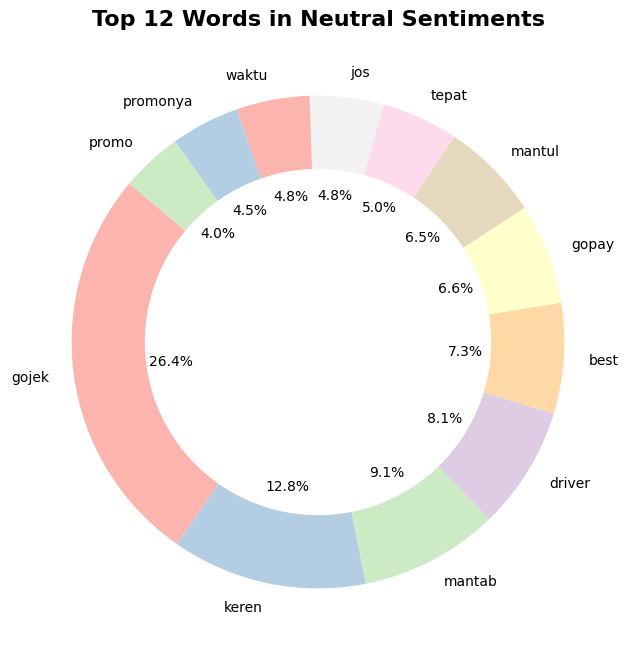

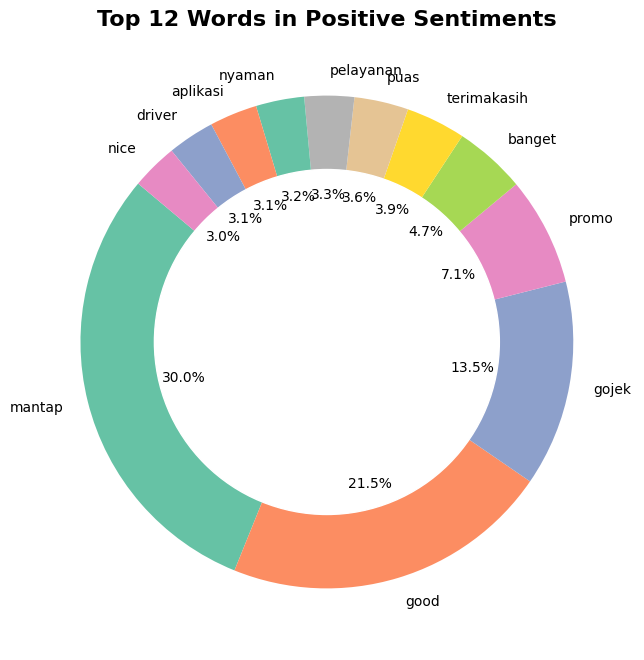

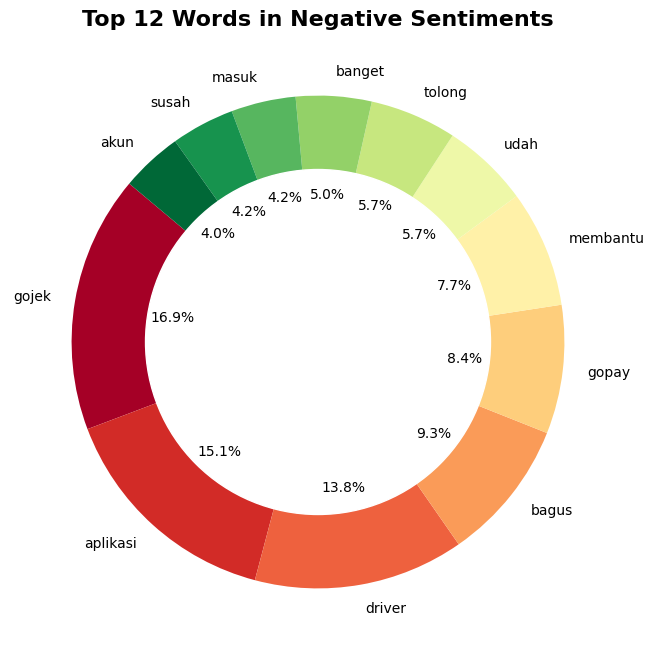

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter
import numpy as np
import re  # Import re untuk pembersihan teks

# Path file input
input_path = r'J:\Drive Saya\analisa sentimen git\percobaan 12\data_sentimenv2.csv'

# Load dataset
df = pd.read_csv(input_path)

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Hapus karakter yang tidak diinginkan: tanda kutip, tanda kurung, dan lainnya
    text = re.sub(r"[\[\]\'\",]", "", text)
    return text

# Terapkan pembersihan pada kolom 'data_Preprocessing'
df['cleaned_data'] = df['data_Preprocessing'].apply(clean_text)

# Filter data berdasarkan sentimen
df_neutral = df[df['sentimen'] == 'neutral']
df_positive = df[df['sentimen'] == 'positive']
df_negative = df[df['sentimen'] == 'negative']

# Fungsi untuk mendapatkan kata unik dan hitungannya
def get_top_words(df, top_n=12):
    all_words = df['cleaned_data'].str.split(expand=True).stack()
    word_counts = Counter(all_words)
    top_words = word_counts.most_common(top_n)
    words, counts = zip(*top_words)
    return pd.DataFrame({'words': words, 'count': counts})

# Neutral
top_neutral_words = get_top_words(df_neutral, top_n=12)

# Positive
top_positive_words = get_top_words(df_positive, top_n=12)

# Negative
top_negative_words = get_top_words(df_negative, top_n=12)

# Fungsi untuk membuat Donut Plot
def plot_donut(data, title, colors):
    plt.figure(figsize=(8, 8))
    my_circle = plt.Circle((0, 0), 0.7, color='white')
    plt.pie(data['count'], labels=data['words'], colors=colors, autopct='%1.1f%%', startangle=140)
    plt.gca().add_artist(my_circle)
    plt.title(title, fontsize=16, weight='bold')
    plt.show()

# Warna untuk Donut Plot
colors_neutral = ListedColormap(plt.cm.Pastel1.colors).colors
colors_positive = ListedColormap(plt.cm.Set2.colors).colors
colors_negative = plt.cm.RdYlGn(np.linspace(0, 1, 12))  # Menggunakan linspace untuk mengambil warna dari colormap RdYlGn

# Plot untuk masing-masing sentimen
plot_donut(top_neutral_words, 'Top 12 Words in Neutral Sentiments', colors_neutral)
plot_donut(top_positive_words, 'Top 12 Words in Positive Sentiments', colors_positive)
plot_donut(top_negative_words, 'Top 12 Words in Negative Sentiments', colors_negative)


In [1]:
import pandas as pd

# Path ke file CSV
file_path = r"J:\Drive Saya\analisa sentimen git\percobaan 12\data_sentimenv2.csv"

# Membaca file CSV
data = pd.read_csv(file_path)

# Menghitung jumlah tiap kategori sentimen
sentimen_count = data['sentimen'].value_counts()

# Menampilkan hasil
print(sentimen_count)


sentimen
negative    73576
neutral     56153
positive    53627
Name: count, dtype: int64
